Chia dataset

In [4]:
import shutil
import os
from sklearn.model_selection import train_test_split

def split_dataset(input_dir, output_dir, train_ratio, val_ratio, test_ratio):

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for char_folder in os.listdir(input_dir):
        char_path = os.path.join(input_dir, char_folder)

        if os.path.isdir(char_path):
            # Lấy tất cả file ảnh trong thư mục ký tự
            images = os.listdir(char_path)
            train_files, test_val_files = train_test_split(images, test_size=(val_ratio + test_ratio), random_state=42)
            val_files, test_files = train_test_split(test_val_files, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42)

            # Tạo các thư mục train, val, test
            for split, files in zip(['train', 'val', 'test'], [train_files, val_files, test_files]):
                split_dir = os.path.join(output_dir, split, char_folder)
                os.makedirs(split_dir, exist_ok=True)

                for file in files:
                    src_path = os.path.join(char_path, file)
                    dst_path = os.path.join(split_dir, file)
                    shutil.copy(src_path, dst_path)

    print(f"Dataset đã được chia thành các thư mục: {output_dir}/train, {output_dir}/val, {output_dir}/test")

# Thực hiện chia dataset
input_dir = 'E:/WorkspaceHDD/Python/NhatKiTu/processed_images_3000'
output_dir = './dataset/split_dataset'  # Thư mục chứa kết quả chia
split_dataset(input_dir, output_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15)


Dataset đã được chia thành các thư mục: ./dataset/split_dataset/train, ./dataset/split_dataset/val, ./dataset/split_dataset/test


Huấn luyện mô hình

Found 67093 images belonging to 32 classes.
Found 14377 images belonging to 32 classes.
Found 14378 images belonging to 32 classes.


D:\Tien\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │        16,416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369,792 (1.41 MB)

 Trainable params: 369,344 (1.41 MB)

 Non-trainable params: 448 (1.75 KB)

D:\Tien\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.6740 - loss: 1.1115

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 181s 161ms/step - accuracy: 0.6741 - loss: 1.1109 - val_accuracy: 0.9711 - val_loss: 0.0979 - learning_rate: 0.0010
Epoch 2/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.9616 - loss: 0.1376

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 157s 150ms/step - accuracy: 0.9616 - loss: 0.1376 - val_accuracy: 0.9801 - val_loss: 0.0663 - learning_rate: 0.0010
Epoch 3/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9698 - loss: 0.1044

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 155s 148ms/step - accuracy: 0.9698 - loss: 0.1043 - val_accuracy: 0.9833 - val_loss: 0.0533 - learning_rate: 0.0010
Epoch 4/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.9760 - loss: 0.0821

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 158s 150ms/step - accuracy: 0.9760 - loss: 0.0821 - val_accuracy: 0.9874 - val_loss: 0.0507 - learning_rate: 0.0010
Epoch 5/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9784 - loss: 0.0761

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 151s 144ms/step - accuracy: 0.9784 - loss: 0.0761 - val_accuracy: 0.9892 - val_loss: 0.0386 - learning_rate: 0.0010
Epoch 6/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 148s 141ms/step - accuracy: 0.9819 - loss: 0.0670 - val_accuracy: 0.9881 - val_loss: 0.0408 - learning_rate: 0.0010
Epoch 7/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 149s 142ms/step - accuracy: 0.9826 - loss: 0.0646 - val_accuracy: 0.9886 - val_loss: 0.0386 - learning_rate: 0.0010
Epoch 8/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 147s 140ms/step - accuracy: 0.9842 - loss: 0.0581 - val_accuracy: 0.9887 - val_loss: 0.0386 - learning_rate: 0.0010
Epoch 9/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9864 - loss: 0.0493

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 150s 143ms/step - accuracy: 0.9864 - loss: 0.0493 - val_accuracy: 0.9909 - val_loss: 0.0313 - learning_rate: 0.0010
Epoch 10/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.9865 - loss: 0.0497

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 158s 151ms/step - accuracy: 0.9865 - loss: 0.0497 - val_accuracy: 0.9919 - val_loss: 0.0297 - learning_rate: 0.0010
Epoch 11/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.9862 - loss: 0.0485

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 162s 154ms/step - accuracy: 0.9862 - loss: 0.0484 - val_accuracy: 0.9927 - val_loss: 0.0274 - learning_rate: 0.0010
Epoch 12/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 149s 142ms/step - accuracy: 0.9885 - loss: 0.0408 - val_accuracy: 0.9899 - val_loss: 0.0389 - learning_rate: 0.0010
Epoch 13/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 151s 143ms/step - accuracy: 0.9878 - loss: 0.0429 - val_accuracy: 0.9919 - val_loss: 0.0307 - learning_rate: 0.0010
Epoch 14/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 156s 149ms/step - accuracy: 0.9885 - loss: 0.0409 - val_accuracy: 0.9916 - val_loss: 0.0297 - learning_rate: 0.0010
Epoch 15/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.9904 - loss: 0.0345

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 148s 141ms/step - accuracy: 0.9904 - loss: 0.0345 - val_accuracy: 0.9928 - val_loss: 0.0327 - learning_rate: 0.0010
Epoch 16/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 150s 143ms/step - accuracy: 0.9897 - loss: 0.0389 - val_accuracy: 0.9914 - val_loss: 0.0346 - learning_rate: 0.0010
Epoch 17/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 148s 141ms/step - accuracy: 0.9895 - loss: 0.0400 - val_accuracy: 0.9909 - val_loss: 0.0371 - learning_rate: 0.0010
Epoch 18/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 163s 155ms/step - accuracy: 0.9902 - loss: 0.0358 - val_accuracy: 0.9927 - val_loss: 0.0279 - learning_rate: 0.0010
Epoch 19/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9900 - loss: 0.0356

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 151s 144ms/step - accuracy: 0.9900 - loss: 0.0356 - val_accuracy: 0.9931 - val_loss: 0.0273 - learning_rate: 0.0010
Epoch 20/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.9918 - loss: 0.0323

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 153s 146ms/step - accuracy: 0.9918 - loss: 0.0323 - val_accuracy: 0.9944 - val_loss: 0.0231 - learning_rate: 0.0010
Epoch 21/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 165s 157ms/step - accuracy: 0.9928 - loss: 0.0270 - val_accuracy: 0.9939 - val_loss: 0.0233 - learning_rate: 0.0010
Epoch 22/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 162s 154ms/step - accuracy: 0.9922 - loss: 0.0297 - val_accuracy: 0.9935 - val_loss: 0.0314 - learning_rate: 0.0010
Epoch 23/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9918 - loss: 0.0343

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 156s 149ms/step - accuracy: 0.9918 - loss: 0.0343 - val_accuracy: 0.9947 - val_loss: 0.0244 - learning_rate: 0.0010
Epoch 24/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 153s 146ms/step - accuracy: 0.9930 - loss: 0.0270 - val_accuracy: 0.9945 - val_loss: 0.0276 - learning_rate: 0.0010
Epoch 25/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 159s 152ms/step - accuracy: 0.9930 - loss: 0.0261 - val_accuracy: 0.9930 - val_loss: 0.0284 - learning_rate: 0.0010
Epoch 26/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.9928 - loss: 0.0297

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 157s 149ms/step - accuracy: 0.9928 - loss: 0.0297 - val_accuracy: 0.9950 - val_loss: 0.0237 - learning_rate: 0.0010
Epoch 27/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 149s 142ms/step - accuracy: 0.9933 - loss: 0.0265 - val_accuracy: 0.9942 - val_loss: 0.0263 - learning_rate: 0.0010
Epoch 28/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 153s 146ms/step - accuracy: 0.9914 - loss: 0.0315 - val_accuracy: 0.9945 - val_loss: 0.0264 - learning_rate: 0.0010
Epoch 29/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 159s 151ms/step - accuracy: 0.9934 - loss: 0.0269 - val_accuracy: 0.9949 - val_loss: 0.0249 - learning_rate: 0.0010
Epoch 30/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 155s 148ms/step - accuracy: 0.9935 - loss: 0.0262 - val_accuracy: 0.9937 - val_loss: 0.0282 - learning_rate: 0.0010
Epoch 31/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9943 - loss: 0.0214
Epoch 31: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 151s 144ms/step -

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 147s 140ms/step - accuracy: 0.9954 - loss: 0.0161 - val_accuracy: 0.9956 - val_loss: 0.0244 - learning_rate: 2.0000e-04
Epoch 33/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9960 - loss: 0.0137

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 146s 140ms/step - accuracy: 0.9960 - loss: 0.0137 - val_accuracy: 0.9958 - val_loss: 0.0240 - learning_rate: 2.0000e-04
Epoch 34/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9964 - loss: 0.0121

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 149s 142ms/step - accuracy: 0.9964 - loss: 0.0121 - val_accuracy: 0.9964 - val_loss: 0.0236 - learning_rate: 2.0000e-04
Epoch 35/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 150s 143ms/step - accuracy: 0.9973 - loss: 0.0104 - val_accuracy: 0.9961 - val_loss: 0.0248 - learning_rate: 2.0000e-04
Epoch 36/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 153s 146ms/step - accuracy: 0.9971 - loss: 0.0095 - val_accuracy: 0.9964 - val_loss: 0.0239 - learning_rate: 2.0000e-04
Epoch 37/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 159s 152ms/step - accuracy: 0.9976 - loss: 0.0088 - val_accuracy: 0.9961 - val_loss: 0.0230 - learning_rate: 2.0000e-04
Epoch 38/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 166s 158ms/step - accuracy: 0.9971 - loss: 0.0098 - val_accuracy: 0.9960 - val_loss: 0.0248 - learning_rate: 2.0000e-04
Epoch 39/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.9983 - loss: 0.0061
Epoch 39: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1049/1049 ━━━━━━━━━━━━━━━━━━

Huấn luyện hoàn tất và mô hình đã được lưu!


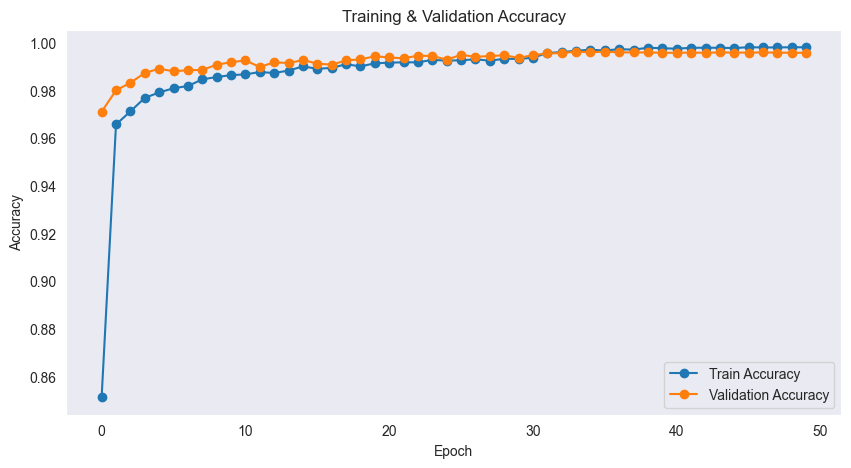

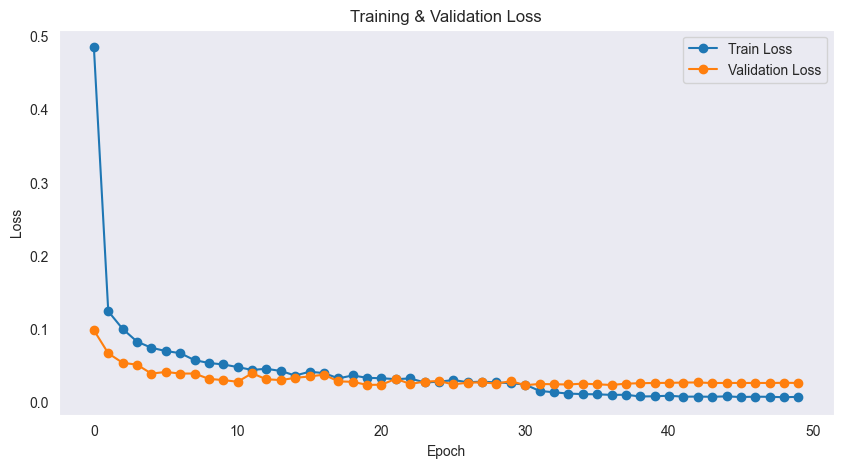

Lịch sử huấn luyện đã được lưu vào training_history.csv


In [5]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from tensorflow.keras.layers import BatchNormalization



# 1. Đường dẫn dữ liệu
base_dir = './dataset/split_dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# 2. ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255
)

validation_datagen = ImageDataGenerator(
    rescale=1.0/255
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255
)

# 3. Load dữ liệu từ thư mục
batch_size = 64
image_size = (28, 28)

train_generator = train_datagen.flow_from_directory(
    train_dir, # Đường dẫn đến thư mục train
    target_size=image_size, # Resize ảnh về 28x28 pixel
    batch_size=batch_size, # Số lượng ảnh mỗi batch
    class_mode='categorical', # One-hot encoding cho nhãn
    shuffle=True, # Xáo trộn dữ liệu học tránh overfiting
    color_mode='grayscale' # Chuyển ảnh thành ảnh xám (1 kênh màu)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode='grayscale'
)


# 4. Xây dựng mô hình CNN
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])
model.summary()

# 5. Biên dịch mô hình
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 6. Thêm callback để giảm tốc độ học và lưu mô hình tốt nhất
checkpoint = ModelCheckpoint('cnn1/model/license_plate_char_best.h5',
                             save_best_only=True,
                             monitor='val_accuracy',
                             mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.2,
                              patience=5,
                              verbose=1)

# 7. Huấn luyện mô hình
epochs = 50

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[checkpoint, reduce_lr]
)

# 8. Lưu mô hình
model.save('cnn1/model/license_plate_char_last.h5')

print("Huấn luyện hoàn tất và mô hình đã được lưu!")


# Vẽ Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.grid()
plt.savefig('cnn1/accuracy_plot.png')  # Lưu ảnh

# Vẽ Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.grid()
plt.savefig('cnn1/loss_plot.png')

plt.show()

history_df = pd.DataFrame(history.history)
history_df.to_csv('cnn1/training_history.csv', index=False)
print("Lịch sử huấn luyện đã được lưu vào training_history.csv")

D:\Tien\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step


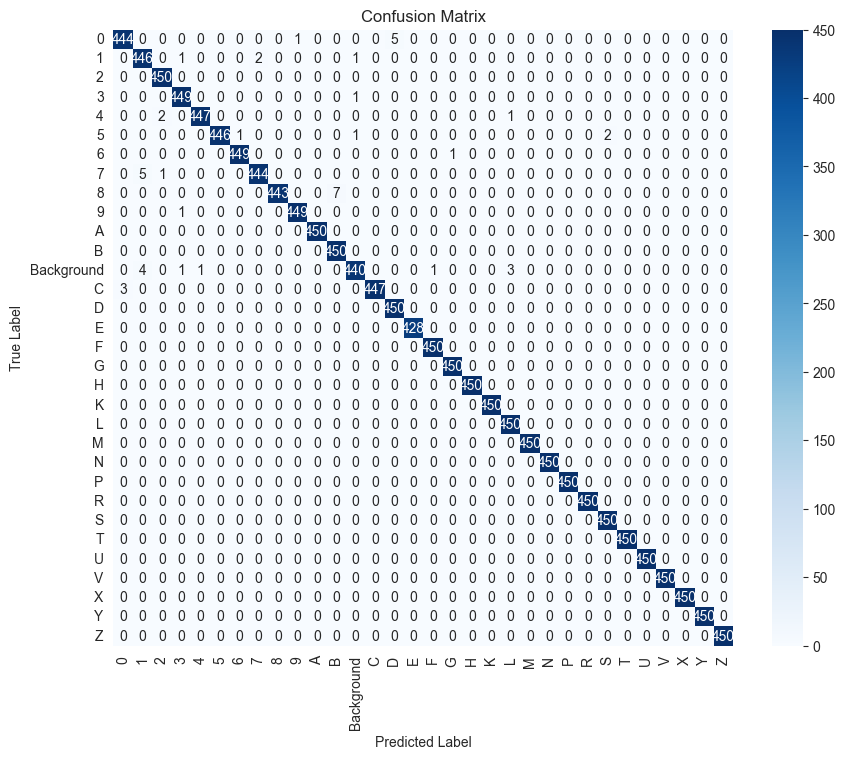

In [6]:
from tensorflow.keras import Sequential
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Dự đoán trên tập test
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Lấy danh sách tên lớp
class_names = list(test_generator.class_indices.keys())

# Tạo confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig('cnn1/confusion_matrix.png')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
char_1.png -> Background
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
char_10.png -> 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
char_2.png -> 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
char_3.png -> 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
char_4.png -> A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
char_5.png -> 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
char_6.png -> 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
char_7.png -> 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
char_8.png -> 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
char_9.png -> Background


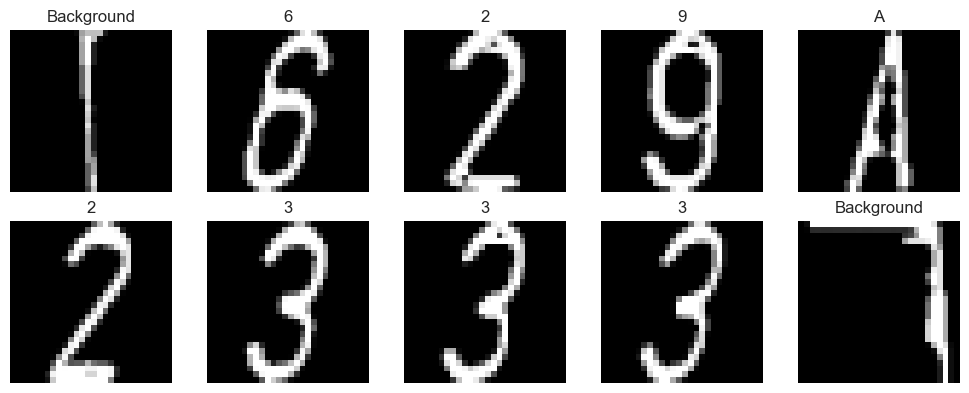

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os

# Load mô hình nhận diện ký tự
model = load_model("cnn/model/license_plate_char_pro_max.h5")

# Danh sách class tĩnh
ALPHA_DICT = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'A', 11: 'B', 12: 'Background', 13: 'C', 14: 'D', 15: 'E', 16: 'F', 17: 'G', 18: 'H',
    19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'P', 24: 'R', 25: 'S', 26: 'T', 27: 'U',
    28: 'V', 29: 'X', 30: 'Y', 31: 'Z'
}

# Thư mục chứa ảnh các ký tự
char_folder = r"E:\WorkspaceHDD\DoAn\VIETNAMESE-LICENSE-PLATE\Traning-cnn\segment-char\29A-23336"

recognized_chars = []
char_images = []

# Đọc ảnh và nhận diện ký tự
for filename in sorted(os.listdir(char_folder)):
    img_path = os.path.join(char_folder, filename)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Không thể đọc {img_path}")
        continue

    img = img.astype('float32') / 255.0
    img_input = np.expand_dims(img, axis=0)
    img_input = np.expand_dims(img_input, axis=-1)

    # Dự đoán ký tự
    pred = model.predict(img_input)
    class_index = np.argmax(pred)
    recognized_char = ALPHA_DICT.get(class_index, "?")  # Lấy ký tự từ dictionary

    recognized_chars.append(recognized_char)
    char_images.append((img, recognized_char))

    print(f"{filename} -> {recognized_char}")

# Hiển thị ảnh và nhãn dự đoán
cols = 5
rows = (len(char_images) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
axes = axes.flatten()

for i, (char_img, char_label) in enumerate(char_images):
    axes[i].imshow(char_img, cmap="gray")
    axes[i].axis("off")
    axes[i].set_title(f"{char_label}")

for i in range(len(char_images), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()


## Đánh giá mô hình của dự án tham khảo:

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing import image
import numpy as np
import os

def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='softmax'))
    return model

model = build_model()
model.load_weights('weight.h5')

ALPHA_DICT = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'K', 9: 'L', 10: 'M', 11: 'N', 12: 'P',
    13: 'R', 14: 'S', 15: 'T', 16: 'U', 17: 'V', 18: 'X', 19: 'Y', 20: 'Z', 21: '0', 22: '1', 23: '2', 24: '3',
    25: '4', 26: '5', 27: '6', 28: '7', 29: '8', 30: '9', 31: "Background"
}

test_folder = './dataset/split_dataset/test'
correct = 0
total = 0

y_true = []
y_pred_classes = []

for root, dirs, files in os.walk(test_folder):
    for filename in files:
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(root, filename)
            ground_truth = os.path.basename(root).upper()

            img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)

            # KHÔNG chuẩn hóa nếu model ban đầu không dùng
            # img_array /= 255.0

            predictions = model.predict(img_array, verbose=0)
            predicted_class_index = np.argmax(predictions, axis=1)[0]
            predicted_char = ALPHA_DICT[predicted_class_index]

            y_true.append(ground_truth)
            y_pred_classes.append(predicted_char)

            if predicted_char == ground_truth:
                correct += 1
            total += 1


accuracy = (correct / total) * 100 if total > 0 else 0
print(f"\nTổng số ảnh: {total}, Đúng: {correct}, Sai: {total - correct}")
print(f"Độ chính xác: {accuracy:.2f}%")


D:\env-NhanDienBienSoXe\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Tổng số ảnh: 14378, Đúng: 12200, Sai: 2178
Độ chính xác: 84.85%


FileNotFoundError: [Errno 2] No such file or directory: 'E:\\WorkspaceHDD\\DoAn\\VIETNAMESE-LICENSE-PLATE\\Traning-cnn\\cnn-thamkhao\\confusion_matrix.png'

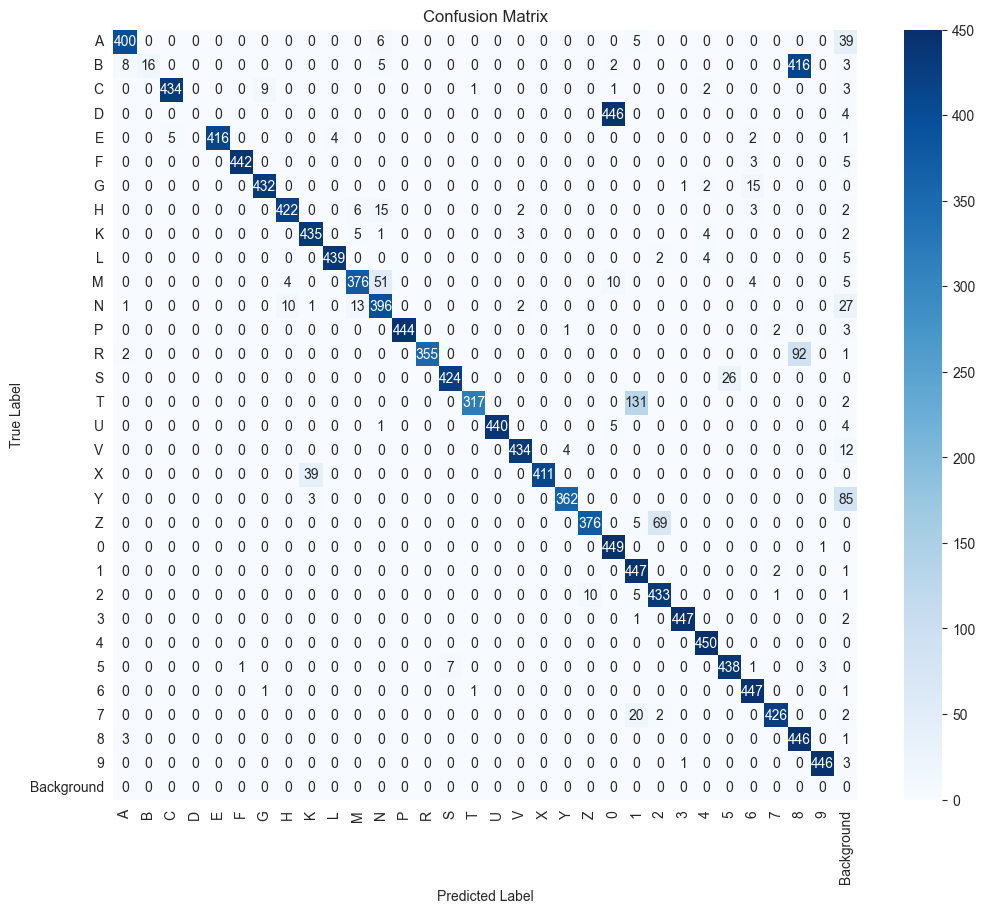

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Lấy danh sách nhãn duy nhất từ ALPHA_DICT
labels = list(ALPHA_DICT.values())

# Tạo confusion matrix
cm = confusion_matrix(y_true, y_pred_classes, labels=labels)

# Vẽ heatmap confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig('cnn-thamkhao/confusion_matrix.png')
plt.show()


## Mô hình training lại:

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing import image
import numpy as np
import os

num_classes = 32

def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.4),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

model = build_model()
model.load_weights('cnn1/model/license_plate_char_best.h5')

ALPHA_DICT = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'A', 11: 'B', 12: 'Background', 13: 'C', 14: 'D', 15: 'E', 16: 'F', 17: 'G', 18: 'H',
    19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'P', 24: 'R', 25: 'S', 26: 'T', 27: 'U',
    28: 'V', 29: 'X', 30: 'Y', 31: 'Z'
}

test_folder = './dataset/split_dataset/test'
correct = 0
total = 0

for root, dirs, files in os.walk(test_folder):
    for filename in files:
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(root, filename)
            ground_truth = os.path.basename(root).upper()

            img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.0  # Chuẩn hóa

            predictions = model.predict(img_array, verbose=0)
            predicted_class_index = np.argmax(predictions, axis=1)[0]
            predicted_char = ALPHA_DICT[predicted_class_index]

            if predicted_char == ground_truth:
                correct += 1
            total += 1

accuracy = (correct / total) * 100 if total > 0 else 0
print(f"\nTổng số ảnh: {total}, Đúng: {correct}, Sai: {total - correct}")
print(f"Độ chính xác: {accuracy:.2f}%")


D:\env-NhanDienBienSoXe\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Tổng số ảnh: 14378, Đúng: 13894, Sai: 484
Độ chính xác: 96.63%
